# Loan Payback

### Import

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

### Path

In [182]:
data_folder = 'input/'
output_folder = 'output/'
plots_folder = 'output/plots/'

### Loading data

In [183]:
train = pd.read_csv(data_folder + "train.csv")
test = pd.read_csv(data_folder + "test.csv")

In [184]:
train.head(5)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [185]:
print(train.isna().sum())
print(test.isna().sum())

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64
id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64


In [186]:
train.dtypes

id                        int64
annual_income           float64
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
interest_rate           float64
gender                   object
marital_status           object
education_level          object
employment_status        object
loan_purpose             object
grade_subgrade           object
loan_paid_back          float64
dtype: object

### Data analysis

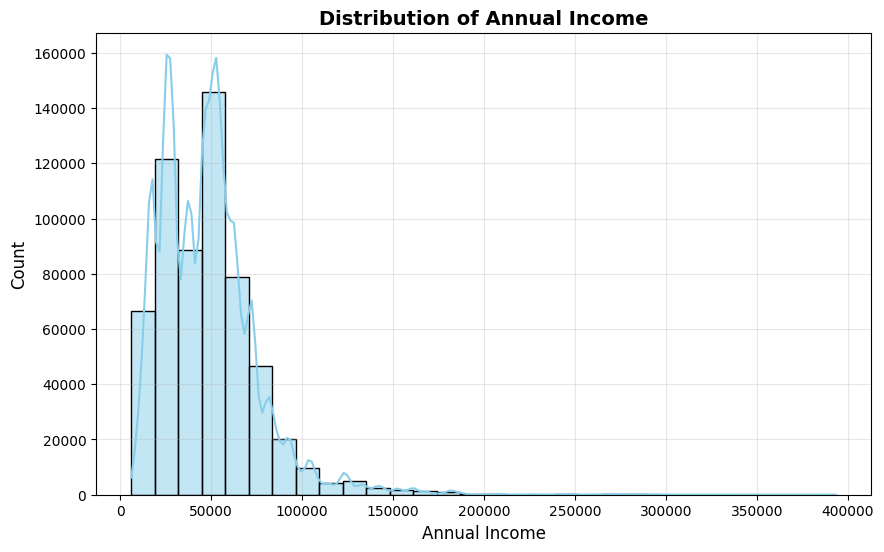


Summary Statistics:
Total data: 593994
Mean annual income: 48212.2
Median annual income: 46557.7
Max annual income: 393381.74
Min annual income: 6002.43
Number of null annual income: 0


In [187]:
annual_income = train['annual_income']

plt.figure(figsize=(10, 6))
sns.histplot(annual_income, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Annual Income', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

print(f'\nSummary Statistics:')
print(f'Total data: {len(annual_income)}')
print(f'Mean annual income: {annual_income.mean():.1f}')
print(f'Median annual income: {annual_income.median():.1f}')
print(f'Max annual income: {annual_income.max()}')
print(f'Min annual income: {annual_income.min()}')
print(f'Number of null annual income: {annual_income.isnull().sum()}')

## PreProcessing

In [201]:
IDTrain = train['id']
id = test['id']

train.drop(['id'], axis=1)
test.drop(['id'], axis=1)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1
...,...,...,...,...,...,...,...,...,...,...,...
254564,92835.97,0.068,744,29704.00,13.48,Female,Single,Bachelor's,Employed,Debt consolidation,B2
254565,48846.47,0.091,634,20284.33,9.58,Female,Married,High School,Employed,Debt consolidation,D4
254566,20668.52,0.096,718,26387.55,9.00,Male,Single,Master's,Employed,Debt consolidation,C4
254567,34105.09,0.094,739,11107.36,9.81,Male,Single,Bachelor's,Employed,Business,C2


In [189]:
print(train['gender'].unique())
print(train['marital_status'].unique())
print(train['education_level'].unique())
print(train['employment_status'].unique())
print(train['loan_purpose'].unique())
print(train['grade_subgrade'].unique())

['Female' 'Male' 'Other']
['Single' 'Married' 'Divorced' 'Widowed']
['High School' "Master's" "Bachelor's" 'PhD' 'Other']
['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']
['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']
['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']


In [190]:
# Création du OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Encodage
encoded = encoder.fit_transform(train[['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose']])

# Création d’un DataFrame avec les colonnes correspondantes
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose']))
encoded_df

# Encodage
encoded = encoder.fit_transform(test[['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose']])

# Création d’un DataFrame avec les colonnes correspondantes
encoded_df_Test = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose']))
encoded_df_Test

,gender_Female,gender_Male,gender_Other,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed,education_level_Bachelor's,education_level_High School,education_level_Master's,...,employment_status_Student,employment_status_Unemployed,loan_purpose_Business,loan_purpose_Car,loan_purpose_Debt consolidation,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254564,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
254565,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
254566,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
254567,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


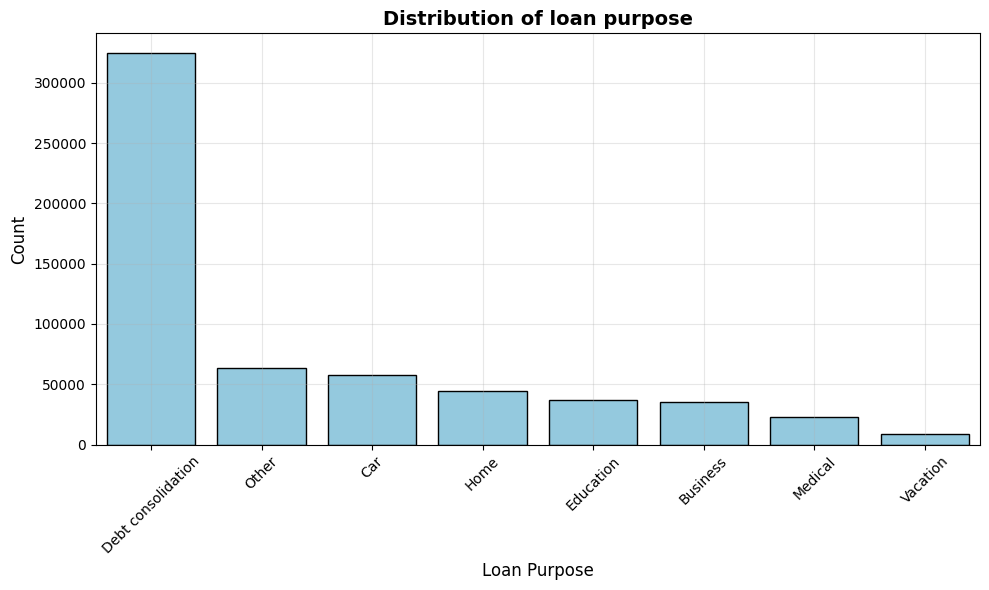

In [191]:
order = train['loan_purpose'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='loan_purpose', order=order, color='skyblue', edgecolor='black')
plt.title('Distribution of loan purpose', fontsize=14, fontweight='bold')
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

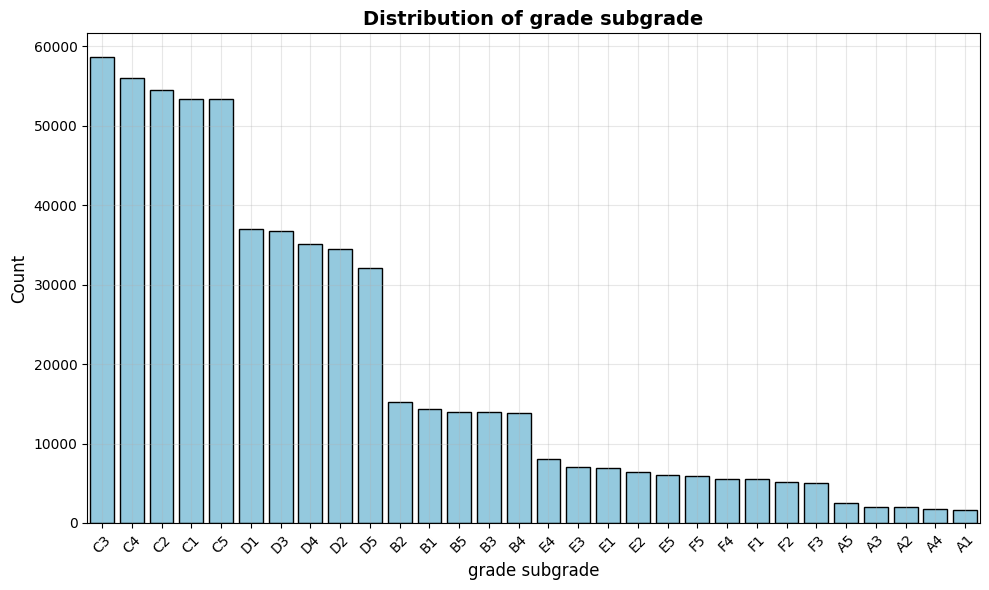

In [192]:
order = train['grade_subgrade'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='grade_subgrade', order=order, color='skyblue', edgecolor='black')
plt.title('Distribution of grade subgrade', fontsize=14, fontweight='bold')
plt.xlabel('grade subgrade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

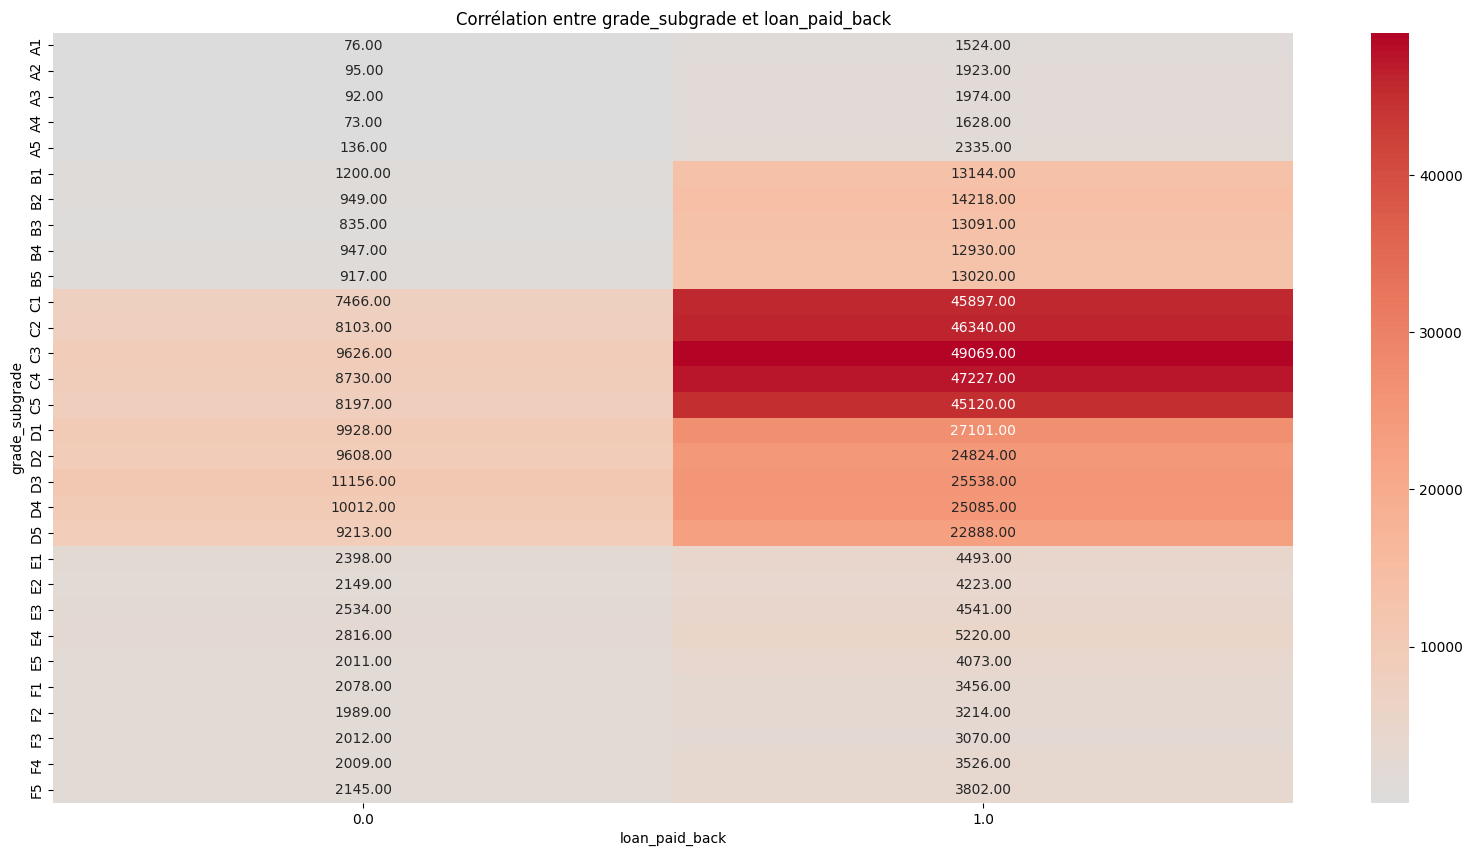

In [193]:
ct = pd.crosstab(train['grade_subgrade'], train['loan_paid_back'])
plt.figure(figsize=(20, 10))
sns.heatmap(ct, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Corrélation entre grade_subgrade et loan_paid_back")
plt.show()

In [194]:
train.iloc[0]['grade_subgrade']

'C3'

In [ ]:
grade_subgrade_train = []

for dataID in range(len(train)):
     match train.iloc[dataID]['grade_subgrade']:
        case "A1" | "A2" | "A3" | "A4" | "A5":
            grade_subgrade_train.append("A")
        case "B1" | "B2" | "B3" | "B4" | "B5":
            grade_subgrade_train.append("B")
        case "C1" | "C2" | "C3" | "C4" | "C5":
            grade_subgrade_train.append("C")
        case "D1" | "D2" | "D3" | "D4" | "D5":
            grade_subgrade_train.append("D")
        case "E1" | "E2" | "E3" | "E4" | "E5":
            grade_subgrade_train.append("E")
        case "F1" | "F2" | "F3" | "F4" | "F5":
            grade_subgrade_train.append("F")
        case _:
            grade_subgrade_train.append(None)

grade_subgrade_train = pd.DataFrame(grade_subgrade_train)
grade_subgrade_train.rename(columns={'0': 'grade_subgrade'}, inplace=True)

grade_subgrade_test = []

for dataID in range(len(test)):
     match test.iloc[dataID]['grade_subgrade']:
        case "A1" | "A2" | "A3" | "A4" | "A5":
            grade_subgrade_test.append("A")
        case "B1" | "B2" | "B3" | "B4" | "B5":
            grade_subgrade_test.append("B")
        case "C1" | "C2" | "C3" | "C4" | "C5":
            grade_subgrade_test.append("C")
        case "D1" | "D2" | "D3" | "D4" | "D5":
            grade_subgrade_test.append("D")
        case "E1" | "E2" | "E3" | "E4" | "E5":
            grade_subgrade_test.append("E")
        case "F1" | "F2" | "F3" | "F4" | "F5":
            grade_subgrade_test.append("F")
        case _:
            grade_subgrade_test.append(None)

grade_subgrade_test = pd.DataFrame(grade_subgrade_test)
grade_subgrade_test.rename(columns={'0': 'grade_subgrade'}, inplace=True)

,0
0,D
1,C
2,D
3,C
4,C


In [207]:
grade_subgrade_test.shape

(254569, 1)

In [208]:
# Encoded
encoded = encoder.fit_transform(grade_subgrade_train)

# Création d’un DataFrame avec les colonnes correspondantes
encoded_df_grades = pd.DataFrame(encoded)
encoded_df_grades

# Encoded
encoded = encoder.fit_transform(grade_subgrade_test)

# Création d’un DataFrame avec les colonnes correspondantes
encoded_df_grades_Test = pd.DataFrame(encoded)
encoded_df_grades_Test

,0,1,2,3,4,5
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
254564,0.0,1.0,0.0,0.0,0.0,0.0
254565,0.0,0.0,0.0,1.0,0.0,0.0
254566,0.0,0.0,1.0,0.0,0.0,0.0
254567,0.0,0.0,1.0,0.0,0.0,0.0


In [209]:
NumberData = train[['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']].copy()
NumberData_Test = test[['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']].copy()

In [211]:
Data_Total_Train = pd.concat([NumberData, encoded_df, encoded_df_grades], axis=1)

Data_Total_Test = pd.concat([NumberData_Test, encoded_df_Test, encoded_df_grades_Test], axis=1)
Data_Total_Test.shape

(254569, 36)

In [212]:
scaler = StandardScaler()

for i in Data_Total_Train.select_dtypes(include=np.number).columns.tolist():
    Data_Total_Train[i]=scaler.fit_transform(Data_Total_Train[[i]])

Data_Total_Train.head(5)

for i in Data_Total_Test.select_dtypes(include=np.number).columns.tolist():
    Data_Total_Test[i]=scaler.fit_transform(Data_Total_Test[[i]])

Data_Total_Test.head(5)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender_Female,gender_Male,gender_Other,marital_status_Divorced,marital_status_Married,...,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,0,1,2,3,4,5
0,-0.728006,-1.043756,-0.989459,-0.513617,1.178469,0.967564,-0.955143,-0.080573,-0.192782,-0.93690,...,-0.28387,-0.198154,2.860986,-0.119852,-0.130675,-0.370645,-0.929878,1.546665,-0.247582,-0.219987
1,-0.060132,-0.402190,0.916193,0.068692,0.246668,0.967564,-0.955143,-0.080573,-0.192782,1.06735,...,-0.28387,-0.198154,2.860986,-0.119852,-0.130675,-0.370645,1.075409,-0.646552,-0.247582,-0.219987
2,0.251568,3.593019,-1.259127,-1.620933,0.464749,-1.033523,1.046963,-0.080573,-0.192782,-0.93690,...,-0.28387,-0.198154,-0.349530,-0.119852,-0.130675,-0.370645,-0.929878,1.546665,-0.247582,-0.219987
3,-0.845389,-0.154312,-0.180456,-1.219629,-1.379028,0.967564,-0.955143,-0.080573,-0.192782,-0.93690,...,-0.28387,-0.198154,-0.349530,-0.119852,-0.130675,-0.370645,1.075409,-0.646552,-0.247582,-0.219987
4,-0.863165,-0.577162,0.125167,0.387183,0.221886,0.967564,-0.955143,-0.080573,-0.192782,1.06735,...,-0.28387,-0.198154,-0.349530,-0.119852,-0.130675,-0.370645,1.075409,-0.646552,-0.247582,-0.219987


In [177]:
xgbr_params = {'max_depth' : 8, 'learning_rate' : 0.01, 'n_estimators' : 2000, 'subsample' : 0.9, 'colsample_bytree' : 0.9, 'eval_metric' : "rmse"}
rf_params = {'random_state': 66, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'squared_error', 'bootstrap': True}

estimators = [
    ('xgbr', XGBRegressor(**xgbr_params)),
]

model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(**rf_params))

In [179]:
y_train = train['loan_paid_back'].copy()

model.fit(Data_Total_Train, y_train)
print("end of model fitting")

end of model fitting


In [213]:
prediction = model.predict(Data_Total_Test)

In [215]:
Data_Total_Test.shape

(254569, 36)

In [ ]:
filename = output_folder + 'submission_xrgb_rf.csv'

pred = []
for i in prediction:
    pred.append(round(i, 3))

submission = pd.DataFrame({
    'id': id,
    'loan_paid_back': pred
})

submission.to_csv(filename, index=False)
print(f"Saved: {filename}")

Saved: output/submission_xrgb_rf.csv
